# Les liens qui vont m'aider a realiser cette tache
Lien pour la resolution du probleme du desequilibre de classe: [link](https://datascientest.com/comment-gerer-les-problemes-de-classification-desequilibree-partie-ii)


In [2]:
# importation des bibliotheques
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings 
filterwarnings('ignore')
plt.style.use('ggplot')


In [3]:
# importation et lecture des donnees
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# ANALYSE EXPLORATOIRE DE DONNEES

## 1. Analyse de la forme

In [4]:
# description du data set
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
# description des variables categoriques
df.describe(include="object")

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [6]:
# types des colonnes
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
# valeurs manquantes
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# nombre de valeurs uniques dans chaque colonne
df.nunique().to_frame('uniques values')

,uniques values
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


In [9]:
# suppression de la colonne Id
df = df.drop("id",axis=1)

## 2. Analyse du fond

### 2.1. Analyse univariee

<Axes: xlabel='Response'>

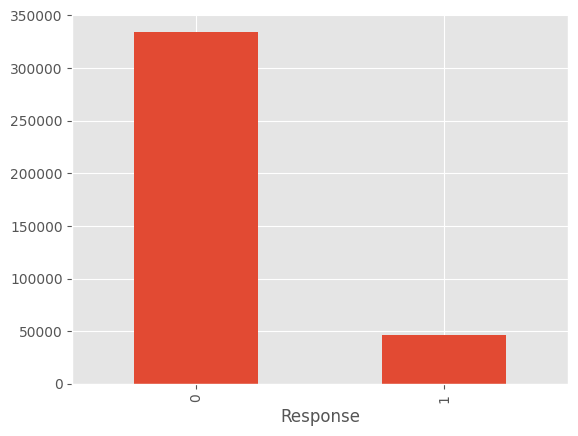

In [10]:
# Visualisation de la variable cible
df["Response"].value_counts().plot.bar()

In [11]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# colonne 'Driving_License'
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

<Axes: xlabel='Gender'>

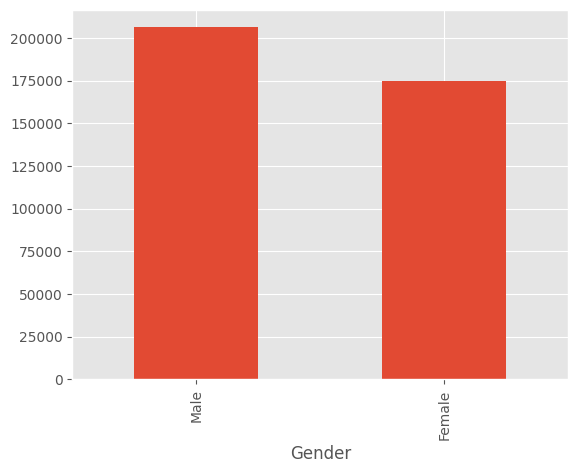

In [17]:
# colonne Gender
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

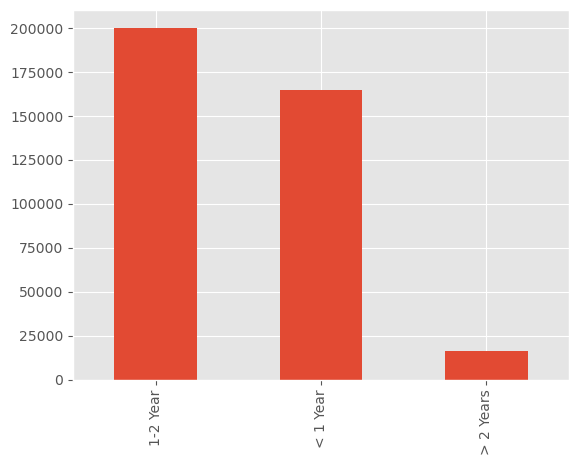

In [ ]:
#la variable vehicul age
df['Vehicle_Age'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age'>

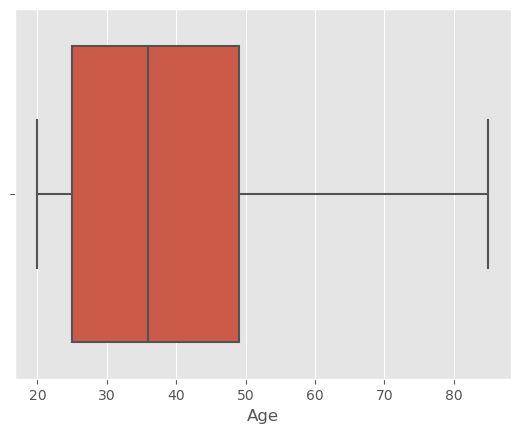

In [ ]:
# la variable age
sns.boxplot("Age", data=df)

<AxesSubplot:xlabel='Annual_Premium'>

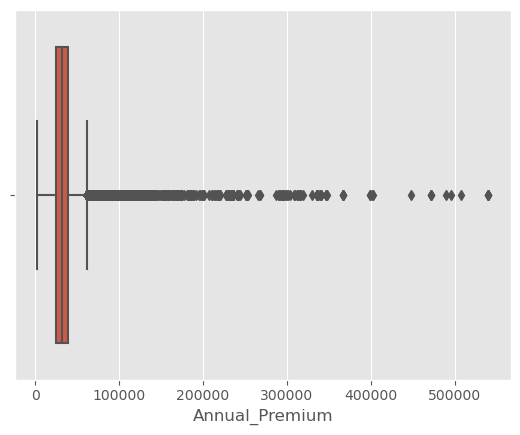

In [ ]:
# la variable Annual_Premium
sns.boxplot("Annual_Premium", data=df)

RQ: Nous remarquons la presence d'un nombre incalculable de valeurs aberrantes, mais leurs presences ne cause pas de probleme compte tenu de la description de la variable et le nombre de valeurs unique qu'elle contient. Donc ce n'est que normal qu'il y ait une forte de valeurs aberrantes dans cette colonne

## 2.2. Analyse multivariee

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# remplacer les valeurs dans les variables Gender et Vehicle_Damage
df['Gender'] = df['Gender'].map({'Male':1, "Female":0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'> 2 Years':2, "1-2 Year":1, "< 1 Year":0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, "No":0})

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


<AxesSubplot:>

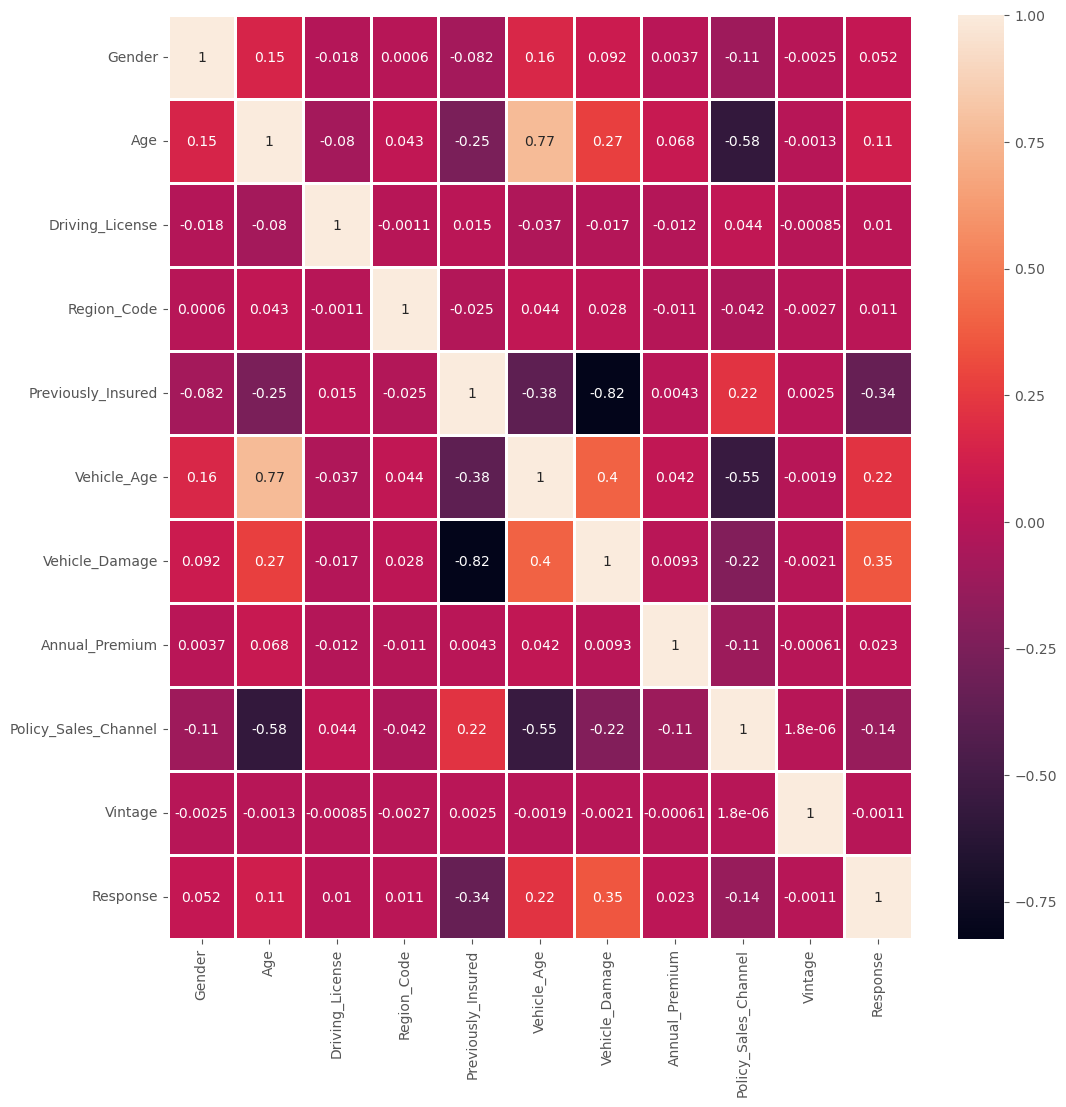

In [ ]:
# la corelation entre toutes les varibale
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=2)
#sns.heatmap()

RQ: De toutes ces variables, nous remarquons une forte correlation en la variable cible et les variables Age, Previousely_Insured, Vehicule_Age, Vehicule_Damage.
Mais toute fois nous tenons a rappeler ces correlations sont lineaires, nous ne sommes pas totalement sur de ces chiffres

In [ ]:
df.loc[(df['Age']>=20) & (df['Age']<27),'Age_label']='Teenagers' 
df.loc[(df['Age']>=27) & (df['Age']<29),'Age_label']='Young' 
df.loc[(df['Age']>=29) & (df['Age']<58),'Age_label']='Middle Age' 
df.loc[(df['Age']>=58) & (df['Age']<=85),'Age_label']='Old Age'


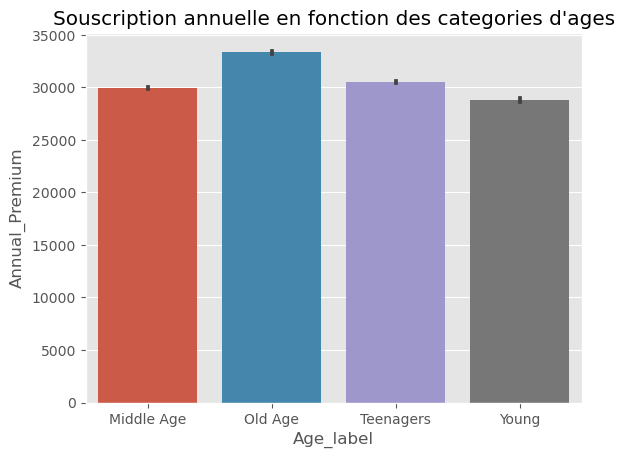

In [ ]:
sns.barplot(df['Age_label'],df['Annual_Premium'])
plt.title("Souscription annuelle en fonction des categories d'ages")
plt.show()

Text(0.5, 1.0, 'Abonnement Premium et fonction des response pour VI')

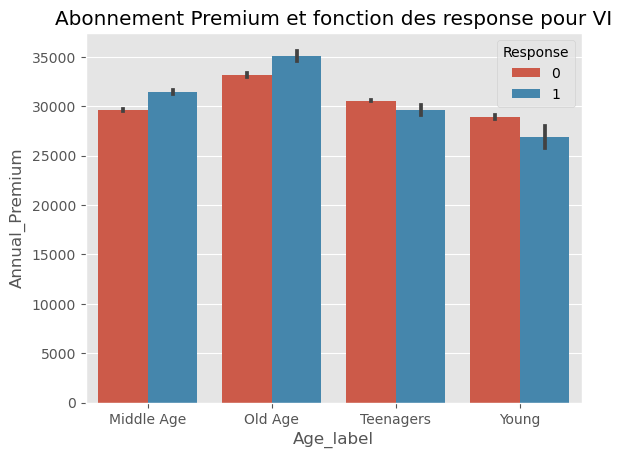

In [ ]:
# relation entre la variable Annual_Premium, age et la target
sns.barplot(df['Age_label'],df['Annual_Premium'],hue=df['Response'])
plt.title("Abonnement Premium et fonction des response pour VI")

RQ: nous remarquons que les personnes adultes et agees sont ceux qui renouvelle facilement le forfait apres la peremption, donc pou une bonne politique de marketing nous recommandons de plus cibler les personnes en age adulte en montant

In [ ]:
# verifions et nombre des personnes agees dans la variable Age_label
df['Age_label'].value_counts()

Middle Age    179126
Teenagers     128040
Old Age        54209
Young          19734
Name: Age_label, dtype: int64

RQ: Bizarement le nombre de personnes agees est tres inferieur par rapport au nombre d'ado et les personnnes adultes, mais se sont eux qui souscrivent le plus au forfait premium plus que tout le reste de categories d'age.

Text(0.5, 1.0, "Nombre de souscription l'annee derniere en fonction des souscriptions ressents")

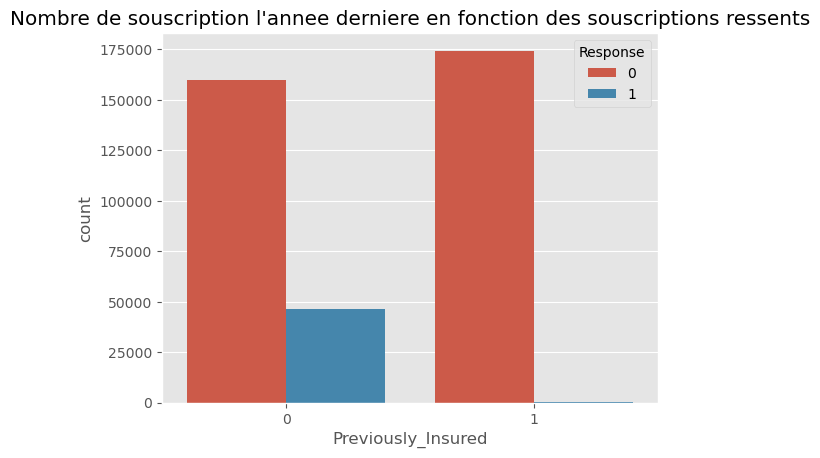

In [ ]:
# relation entre la variable Previously_Insurent et la target
sns.countplot(df['Previously_Insured'], hue=df['Response'])
plt.title("Nombre de souscription l'annee derniere en fonction des souscriptions ressents")

In [163]:
df
y_target = df["Response"]

Text(0.5, 1.0, 'Relation entre la variable New_age et la variable cible')

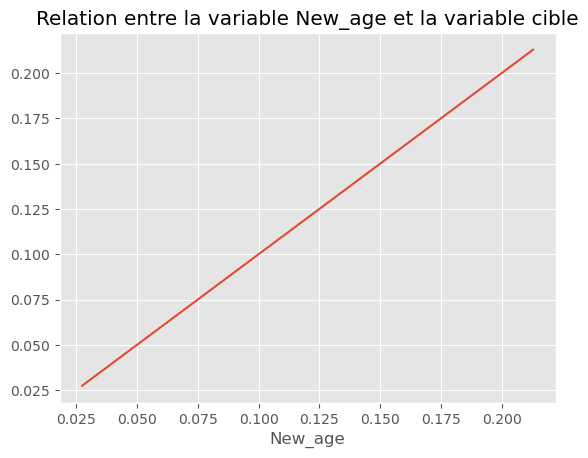

In [164]:
# entrainner le modele
model_dtree = DecisionTreeClassifier(max_depth=4, random_state=500)
model_dtree.fit(x_train.Age.to_frame(), y_target)
# calculer la probabilite
df['New_age'] = model_dtree.predict_proba(df.Age.to_frame())[:,1]
df.groupby("New_age")["Response"].mean().plot()
plt.title("Relation entre la variable New_age et la variable cible")

RQ: Nous remarquons que la relation entre ces deux variables est exponnentielle, ce qui veut dire que nous avons bien faire de creer cette nouvelle variable